#THE SPARKS FOUNDATION - DATA SCIENCE (GRIP FEBRUARY 2022)

##TASK1 - PREDICTION USING SUPERVISED MACHINE LEARNING

####In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.


#Author : Archana Pandita

#Importing Libraries

In [ ]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
import matplotlib.pyplot as plt  

#Choose Dataset file from remote link


In [ ]:
url = "http://bit.ly/w-data"

#Read Dataset And View

In [ ]:
dataset = pd.read_csv(url)
print("Data imported successfully")
print(dataset)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


#Summarize Dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
print(dataset.shape)
dataset=pd.DataFrame(dataset)
dataset.head(5)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print(dataset["Hours"].nunique())
dataset["Hours"].unique()

23


array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [ ]:
print(dataset["Scores"].nunique())
dataset["Scores"].unique()

23


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

#Find any relationship between the data Variables. We can create the plot with the following script:

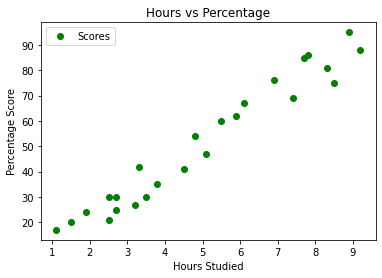

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o',color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [ ]:
X = dataset.iloc[:,:-1]
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
y = dataset.iloc[:, 1]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

#Splitting Dataset into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Training the Algorithm

####We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)

[[ 0.93209944]
 [ 0.56648174]
 [-1.78972121]
 [-0.16475365]
 [ 0.89147525]
 [-0.89598905]
 [ 1.13522039]
 [ 1.50083809]
 [ 0.24148823]
 [-0.81474068]
 [-1.13973419]
 [-0.0022569 ]
 [-1.13973419]
 [ 1.21646876]
 [-1.22098256]
 [-0.28662622]
 [ 1.37896552]
 [-0.40849879]]


In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


##Plotting the regression line

In [ ]:
line = regressor.coef_*X+regressor.intercept_

##Plotting for the test data

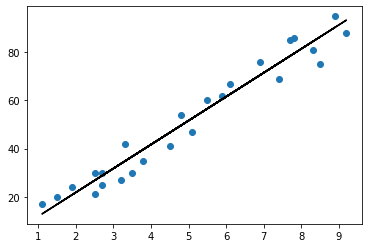

In [ ]:
plt.scatter(X, y)
plt.plot(X, line,color='black');
plt.show()

#Prediction for all Test Data

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


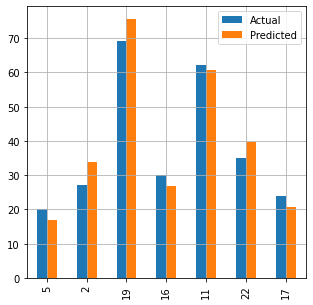

In [ ]:
df.plot(kind='bar',figsize=(5,5))
plt.grid()

In [ ]:
# You can also test with your own data
#hours = 9.25
hours=np.array([[9.25]])
Prediction = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(Prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#Evaluating the model
###The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.
###For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


#According to regression model, if a student studies for 9.25 hrs/ day then the predicted score will be 93.89